importing Libraries

In [227]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import datetime as dt

LOading data

In [228]:
data=pd.read_excel('assignment_python.xlsx',header=0)
data

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazÄ±ÄŸ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,ÃœskÃ¼dar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29
...,...,...,...,...,...,...,...
22060,147844121,M,Ä°stanbul,Turkey,50.0,2022-08-31,2022-08-31
22061,147844491,M,EskiÅŸehir,Turkey,50.0,2022-08-31,2022-08-31
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31


In [229]:
data.to_csv('assignment_python.csv', index=False)
data

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazÄ±ÄŸ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,ÃœskÃ¼dar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29
...,...,...,...,...,...,...,...
22060,147844121,M,Ä°stanbul,Turkey,50.0,2022-08-31,2022-08-31
22061,147844491,M,EskiÅŸehir,Turkey,50.0,2022-08-31,2022-08-31
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31


In [230]:
data.isna().sum()

IDCUSTOMER              0
GENDER                  0
CITY                    0
COUNTRY                 0
FIRST_DEPOSIT_AMOUNT    0
REGISTRATION_DATE       0
DEPOSIT_DATE            0
dtype: int64

In [231]:
np.mean(data["FIRST_DEPOSIT_AMOUNT"])

284.80652979832314

In [232]:
data.shape

(22065, 7)

In [236]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].unique())

[  5075649   5176235   5249140 ... 147846481 147843561 147844971]
['M' 'F' 'M  ']
['ankara' 'elazÄ±ÄŸ' 'izmir' 'ÃœskÃ¼dar' 'sakarya' 'ANKARA'
 'hatay antakya' 'Ä°stanbul' 'antalya' 'tekirdaÄŸ Ã§orlu'
 'istanbul kadikÃ¶y' 'milas' 'eskÄ±sehÄ±r' 'KahramanmaraÅŸ'
 'KIRKLARELÄ° LULEBURGAZ' 'Hatay' 'Mersin' 'yalova' 'SAKARYA AKYAZI'
 'Ä°stinye SarÄ±yer' 'BÃœYÃœKÃ‡EKMECE' 'hatay' 'Ä°STANBUL' 'konya'
 'istanbul fatih' 'Ankara' 'MERKEZ' 'bayraklÄ±' 'istanbul' 'kayseri'
 'merkez' 'lara/antalya' 'KeÃ§iÃ¶ren' 'SÄ°NCAN/ANKARA' 'bahÃ§elievler'
 'istanbul maltepe' 'izmir menemen' 'gebze' 'Rize' 'yÄ±ldÄ±rÄ±m'
 'sanliurfa' 'mecidiyekÃ¶y' 'van' 'esenler' 'EDÄ°RNE'
 'beÅŸiktaÅŸ/istanbul' 'alsancak' 'konya selcuklu' 'muÄŸla'
 'istanbul / zeytinburnu' 'adana/Ã§ukurova' 'Ã§ankÄ±rÄ±' 'Ã‡anakkale'
 'zeytinburnu' 'mimsin- kayseri' 'kumluca' 'KÄ±zÄ±ltepe' 'bayrampasa'
 'afyon' 'TOKAT/Turhal' 'ANTALYA' 'k,maraÅŸ /elbistan' 'Meram'
 'Ä°ZMÄ°R -- FOÃ‡A' 'Burdur' 'Trabzon' 'BAÅžAKÅžEHÄ°R/Ä°STANBUL'
 'izmir/konak' 'K

In [237]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].value_counts())

5075649      1
146921051    1
146922891    1
146916741    1
146920071    1
            ..
146117831    1
146116641    1
146119551    1
146112851    1
147844971    1
Name: IDCUSTOMER, Length: 22065, dtype: int64
M      21985
F         79
M          1
Name: GENDER, dtype: int64
Ä°stanbul            4770
Bursa                1652
DiyarbakÄ±r          1307
Ankara               1182
Ä°zmir               1151
                     ... 
Ã§orlu tekirdaÄŸ        1
istanbul/sarÄ±yer       1
ksk                     1
edirne keÅŸan           1
Batman Merkez           1
Name: CITY, Length: 331, dtype: int64
Turkey    22065
Name: COUNTRY, dtype: int64
100.00     6498
50.00      3693
500.00     1488
200.00     1353
1000.00    1092
           ... 
219.63        1
214.50        1
477.05        1
158.65        1
86.00         1
Name: FIRST_DEPOSIT_AMOUNT, Length: 634, dtype: int64
2022-03-22    148
2022-03-03    145
2022-03-18    144
2022-03-15    144
2022-02-13    142
             ... 
2018-04-21      1

In [238]:
print(data.dtypes)

IDCUSTOMER                       int64
GENDER                          object
CITY                            object
COUNTRY                         object
FIRST_DEPOSIT_AMOUNT           float64
REGISTRATION_DATE       datetime64[ns]
DEPOSIT_DATE            datetime64[ns]
dtype: object


In [239]:
from datetime import datetime

TIME PERIOD

In [240]:
def calculate_active_period(REGISTRATION_DATE,DEPOSIT_DATE):
    active_period = (DEPOSIT_DATE-REGISTRATION_DATE).days
    return active_period

In [140]:
REGISTRATION_DATE = datetime(2009, 6, 7)  # customer ID - 5371454
DEPOSIT_DATE = datetime(2022, 5, 29)
days_active = calculate_active_period(REGISTRATION_DATE,DEPOSIT_DATE)
print("The customer has been active for", days_active, "days.")

The customer has been active for 4739 days.


In [141]:
def calculate_active_period(REGISTRATION_DATE, DEPOSIT_DATE ):
    REGISTRATION_DATE = datetime.strptime(REGISTRATION_DATE, "%Y-%m-%d").date()
    DEPOSIT_DATE = datetime.strptime(DEPOSIT_DATE, "%Y-%m-%d").date()

In [158]:
active_period = (DEPOSIT_DATE- REGISTRATION_DATE).days
print (active_period)

4739


In [159]:
active_period = (DEPOSIT_DATE - REGISTRATION_DATE).days
print('active_period')

active_period


In [160]:
filtered_data=data[['COUNTRY','IDCUSTOMER']].drop_duplicates()


<Axes: >

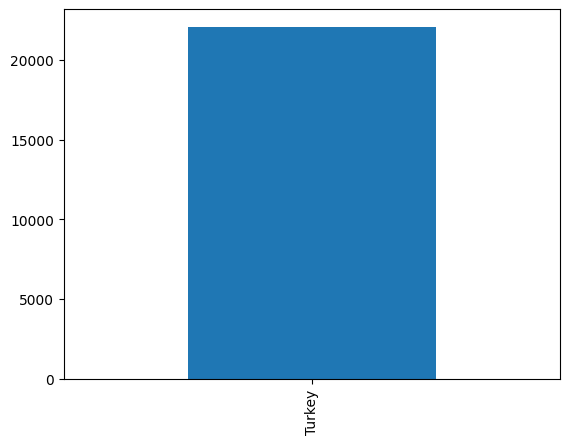

In [161]:

filtered_data.COUNTRY.value_counts()[:1].plot(kind='bar')


In [162]:
Turkey_data=data[data.COUNTRY=='Turkey']
Turkey_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22065 entries, 0 to 22064
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   IDCUSTOMER            22065 non-null  int64         
 1   GENDER                22065 non-null  object        
 2   CITY                  22065 non-null  object        
 3   COUNTRY               22065 non-null  object        
 4   FIRST_DEPOSIT_AMOUNT  22065 non-null  float64       
 5   REGISTRATION_DATE     22065 non-null  datetime64[ns]
 6   DEPOSIT_DATE          22065 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 1.3+ MB


In [163]:
Turkey_data.describe()


,IDCUSTOMER,FIRST_DEPOSIT_AMOUNT
count,2.206500e+04,22065.000000
mean,1.380593e+08,284.806530
std,3.272693e+07,943.993064
min,5.075649e+06,0.380000
25%,1.459097e+08,70.000000
50%,1.465139e+08,100.000000
75%,1.471483e+08,250.000000
max,1.478480e+08,100000.000000


In [164]:
Turkey_data=Turkey_data[['IDCUSTOMER','GENDER','CITY','FIRST_DEPOSIT_AMOUNT','REGISTRATION_DATE','DEPOSIT_DATE']]


In [166]:
Turkey_data['Customer_Lifetime'] = Turkey_data['DEPOSIT_DATE'] - Turkey_data['REGISTRATION_DATE']


In [167]:
Turkey_data_group=Turkey_data.groupby('IDCUSTOMER').agg({'DEPOSIT_DATE': lambda date: (date.max() - date.min()).days})


In [168]:
Turkey_data_group.head()


,DEPOSIT_DATE
IDCUSTOMER,
5075649,0
5176235,0
5249140,0
5300998,0
5371454,0


In [169]:
Turkey_data.head()


,IDCUSTOMER,GENDER,CITY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer_Lifetime
0,5075649,M,ankara,100.0,2009-01-10,2022-06-05,4894 days
1,5176235,M,elazÄ±ÄŸ,400.0,2009-03-01,2022-02-11,4730 days
2,5249140,M,izmir,200.0,2009-04-06,2022-05-02,4774 days
3,5300998,M,ÃœskÃ¼dar,100.0,2009-05-02,2022-02-11,4668 days
4,5371454,M,sakarya,880.0,2009-06-07,2022-05-29,4739 days


UNIQUE

In [170]:
unique_customers = data.groupby(['CITY', 'COUNTRY'])['IDCUSTOMER'].nunique()

In [171]:
highest_customers = unique_customers.idxmax()

In [172]:
print("City with the highest number of unique customers:", highest_customers[0])
print("Country with the highest number of unique customers:", highest_customers[1])

City with the highest number of unique customers: Ä°stanbul
Country with the highest number of unique customers: Turkey


UNIQUE COUNT

In [173]:
unique_players = data.groupby('COUNTRY')['IDCUSTOMER'].nunique()


In [174]:
sorted_players = unique_players.sort_values(ascending=False)

In [175]:
print(sorted_players)

COUNTRY
Turkey    22065
Name: IDCUSTOMER, dtype: int64


In [176]:
target_city = 'Kayseri'

In [177]:
city_data = data[data['CITY'] == target_city]

In [178]:
unique_players_count = city_data['IDCUSTOMER'].nunique()

In [179]:
print("Number of unique players in", target_city, ":", unique_players_count)

Number of unique players in Kayseri : 369


AVG DEPOSIT

In [180]:
avg_deposit = data.groupby('CITY')['FIRST_DEPOSIT_AMOUNT'].mean()


In [181]:
sorted_avg = avg_deposit.sort_values(ascending=False)

In [182]:
third_city = sorted_avg.index[2]

In [183]:
third_avg_amount = sorted_avg.iloc[2]

In [184]:
print("City with the third-highest average deposit:", third_city)
print("Average deposit amount:", third_avg_amount)

City with the third-highest average deposit: sarÄ±Ã§am/Adana
Average deposit amount: 9000.0


GRAPH

In [185]:
unique_customers = data.groupby('CITY')['IDCUSTOMER'].nunique()

In [186]:
sorted_customers = unique_customers.sort_values(ascending=False)

In [187]:
import matplotlib.pyplot as plt
top_40_cities = sorted_customers.head(40)

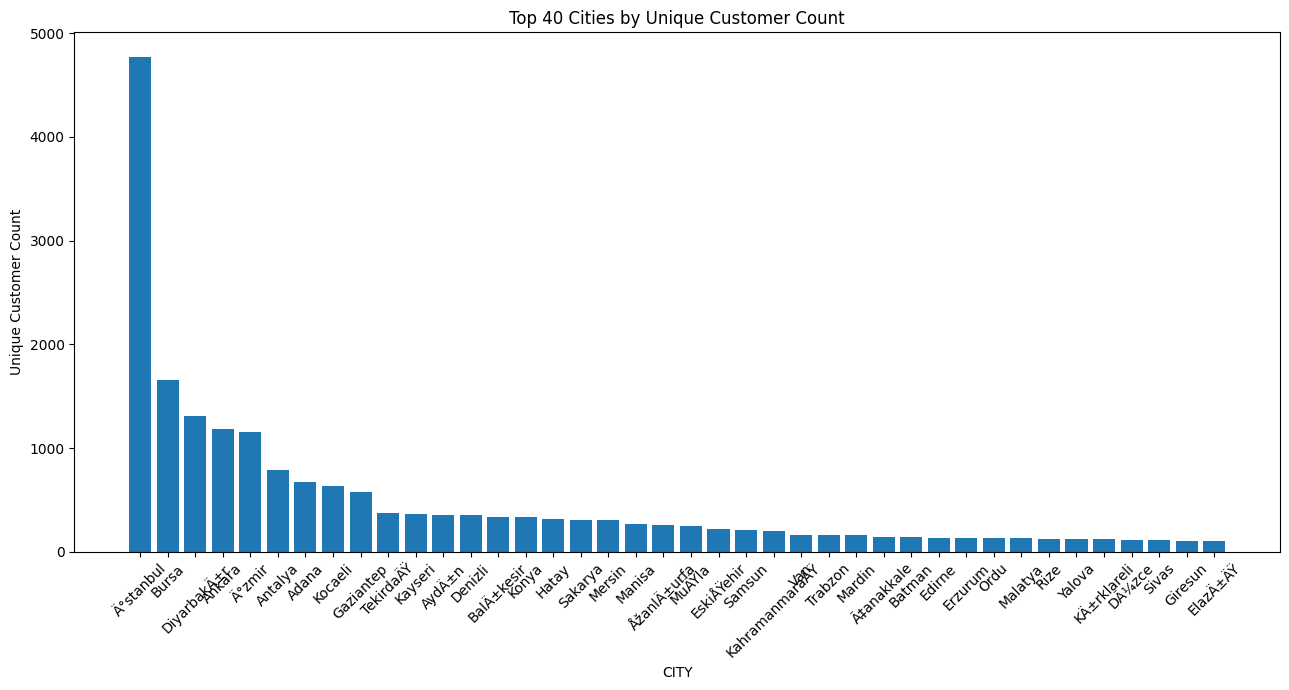

In [188]:
plt.figure(figsize=(13, 7))
plt.bar(top_40_cities.index, top_40_cities.values)
plt.xlabel('CITY')
plt.ylabel('Unique Customer Count')
plt.title('Top 40 Cities by Unique Customer Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conversion for each month

In [201]:
data['REGISTRATION_DATE'] = pd.to_datetime(data['REGISTRATION_DATE'])
data['DEPOSIT_DATE'] = pd.to_datetime(data['DEPOSIT_DATE'])

In [202]:
data['YearMonth'] = data['DEPOSIT_DATE'].dt.to_period('M')

In [203]:
unique_REGISTERATIONS = data['REGISTRATION_DATE'].dt.to_period('M').nunique()
unique_DEPOSITS = data['DEPOSIT_DATE'].dt.to_period('M').nunique()


In [204]:
conversion_percentage = (unique_DEPOSITS/ unique_REGISTERATIONS) * 100

In [205]:
plt.figure(figsize=(10, 6))
plt.bar(conversion_percentage.index.strftime('%Y-%m'), conversion_percentage, color='red')
plt.xlabel('Year & Month')
plt.ylabel('Conversion Percentage')
plt.title('Conversion Percentage by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: ignored

<Figure size 1000x600 with 0 Axes>

In [206]:
data['YearMonth'] = pd.to_datetime(data['DEPOSIT_DATE']).dt.to_period('M')


In [207]:
grouped_data = data.groupby('YearMonth').agg({'FIRST_DEPOSIT_AMOUNT': 'nunique', 'REGISTRATION_DATE': 'nunique'})

In [208]:
grouped_data['Conversion_Percentage'] = (grouped_data['FIRST_DEPOSIT_AMOUNT'] / grouped_data['REGISTRATION_DATE']) * 100

CONVERSIONAL RATE IN 2022

In [209]:
data['YearMonth'] = pd.to_datetime(data['DEPOSIT_DATE']).dt.to_period('M')


In [210]:
june_2022_data = data[data['YearMonth'] == '2022-06']


In [211]:
unique_first_deposits = june_2022_data['FIRST_DEPOSIT_AMOUNT'].nunique()
unique_registrations = june_2022_data['REGISTRATION_DATE'].nunique()

In [212]:
conversion_rate = (unique_first_deposits / unique_registrations) * 100

In [213]:
conversion_rate = round(conversion_rate, 2)

In [214]:
print(f"The conversion rate in June 2022 is: {conversion_rate}%")

The conversion rate in June 2022 is: 87.7%


WEEK DAY

In [215]:
df_ft = pd.read_excel('assignment_python.xlsx')

In [216]:
df_ft['DEPOSIT_DATE'] = pd.to_datetime(df_ft['DEPOSIT_DATE'])

In [217]:
df_ft['Week of Day'] = df_ft['DEPOSIT_DATE'].dt.day_name()

In [218]:
statistics = df_ft.describe()

In [219]:
bins = [0, 500, 1000, 1500, 2000, 2500]

In [220]:
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500']


In [221]:
df_ft['Deposit Amount Bins'] = pd.cut(df_ft['FIRST_DEPOSIT_AMOUNT'], bins=bins, labels=labels)

In [222]:
df_ft.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Week of Day,Deposit Amount Bins
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Sunday,0-500
1,5176235,M,elazÄ±ÄŸ,Turkey,400.0,2009-03-01,2022-02-11,Friday,0-500
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Monday,0-500
3,5300998,M,ÃœskÃ¼dar,Turkey,100.0,2009-05-02,2022-02-11,Friday,0-500
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sunday,500-1000


7 DAYS MOVING AVERAGE

In [241]:
data['REGISTRATION_DATE'] = pd.to_datetime(data['REGISTRATION_DATE'])

In [242]:
registrations_per_day = data.groupby('REGISTRATION_DATE').size()

In [243]:
moving_average = registrations_per_day.rolling(window=7).mean()

In [247]:
print(moving_average)

REGISTRATION_DATE
2009-01-10          NaN
2009-03-01          NaN
2009-04-06          NaN
2009-05-02          NaN
2009-06-07          NaN
                ...    
2022-08-27    69.714286
2022-08-28    72.285714
2022-08-29    69.857143
2022-08-30    67.571429
2022-08-31    66.571429
Length: 1417, dtype: float64
